In [78]:
import pandas as pd
import numpy as np
import glob # to find all files in folder
from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn'

In [79]:
from IPython.core.display import HTML
HTML(filename='data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


In [80]:
original_data = pd.read_excel('data/titanic.xls')
original_data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


Women and children first?

1. Describe each attribute, both with basic statistics and plots. State clearly your assumptions and discuss your findings.
2. -Use the `groupby` method to calculate the proportion of passengers that survived by sex.-
3. Calculate the same proportion, but by class and sex.
4. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

## 2. Use the `groupby` method to calculate the proportion of passengers that survived by sex:

In [81]:
survived_by_sex = original_data[['survived', 'sex']].groupby('sex').sum()
nbr_males = len(original_data[original_data['sex'] == 'male'])
nbr_females = len(original_data[original_data['sex'] == 'female'])
nbr_total = len(original_data['sex'])

In [82]:
print(nbr_total == nbr_females + nbr_males) # to check if consistent

True


In [83]:
female_survived_percentage = (100/nbr_females) * survived_by_sex.at['female', 'survived']
male_survived_percentage = (100/nbr_males) * survived_by_sex.at['male', 'survived']
print('female surv: '+str(round(female_survived_percentage, 3))+'%')
print('male surv: '+str(round(male_survived_percentage, 3))+'%')

female surv: 72.747%
male surv: 19.098%


## 3. Calculate the same proportion, but by class and sex.

In [105]:
original_data['total'] = 1
survived_by_class = original_data[['pclass', 'sex', 'survived', 'total']].groupby(['pclass', 'sex']).sum()
#TODO rename the 'ones' col to 'total nbr person'
survived_by_class


survived  total
pclass sex                    
1      female       139    144
       male          61    179
2      female        94    106
       male          25    171
3      female       106    216
       male          75    493

In [106]:
def combine_surv_total(row):
    #print(row)
    return 100.0/row.total * row.survived
survived_by_class

survived  total
pclass sex                    
1      female       139    144
       male          61    179
2      female        94    106
       male          25    171
3      female       106    216
       male          75    493

In [107]:
survived_by_class['survived in percent'] = survived_by_class.apply(combine_surv_total, axis=1)
survived_by_class

survived  total  survived in percent
pclass sex                                         
1      female       139    144            96.527778
       male          61    179            34.078212
2      female        94    106            88.679245
       male          25    171            14.619883
3      female       106    216            49.074074
       male          75    493            15.212982

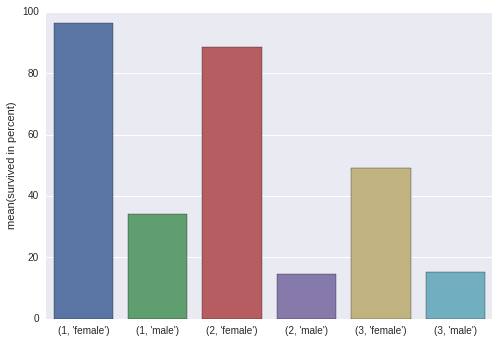

In [110]:
sns.barplot(survived_by_class.index, survived_by_class['survived in percent'])